<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week7/Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Week 7
# Classification 2

Classification is a core technique in data science and machine learning that is used to predict the categories of a target variable, based on some existing labelled dataset. There are many algorithms that we can use, for example:
* Logistic Regression *(already covered in week 6)*
* K-Nearest Neighbours (KNN)
* Decision Tree
* Random Forest
* Support Vector Machines (SVM)
* Naive Bayes
* Neural Networks
* Etc.

Documentation about supervised learning algorithms (including classification and regression) with sklearn can be found [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

This week we cover **K-Nearest Neighbours (KNN)** and **Decision Trees**.

## Table of Contents
#### 1. Introduction /recap on some important concepts


#### 2. Basic examples

#### 3. Drug classification with different algorithms

#### 4. Exercise


## 1. Intro & recap on some important concepts
We first recap some concepts seen in class.

### 1.1 KNN

In the K-Nearest Neighbors algorithm, in order to classify a point, we measure the distance (e.g. Euclidean distance) to the nearest k instances of the training set, and let them vote. K is typically chosen to be an odd number.

![KNN](https://miro.medium.com/max/1300/0*Sk18h9op6uK9EpT8.)


The KNN algorithm is very useful when there are non-linear decision boundaries, as shown below.

![KNN2](https://miro.medium.com/max/374/1*-W7HOfNfWk5BeXgF5jao6g.png)

### 1.2 Decision Trees

Decison trees are also good at handling non linearly separable data. The tree is built based on the training set. At each node, the algorithm chooses a splitting rule (based on a feature) that maximizes the accuracy of the model. More precisely, at every split the algorithm maximizes a certain criterion previously given (e.g. Gini index, information gain). 

The objective of the algorithm is to find the simplest possible decison tree (i.e. only a few nodes = a small depth) with high accuracy. 

In the example below, if we would have chosen another criterion for the first split (e.g. "Exercises in the morning"), we could have ended up with a lower accuracy and/or more splits (i.e. a more complex tree). 

![DT2](https://cdn.educba.com/academy/wp-content/uploads/2019/05/is-a-person-fit.png)

## 2. Basic examples
We illustrate KNN and Decision Tree with simple synthetic data sets.

In [ ]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score

# Customize plots
%matplotlib inline
sns.set_theme(style="white")
plt.style.use('grayscale')

### 2.1 KNN
We create data from scratch. We generate 16 points in the plane [0,1]. Points with low values of x1 and x2 are associated with class 0 and points with high values of x1 and x2 are associated with class 1.

In [ ]:
# Create Data
data = {"x1":[0, 0.4, 0.15, 0.05, 0.4, 0.20, 0, 0.45, 1, 0.85, 0.9, 0.7, 0.65, 0.95, 1, 0.8],
"x2":[0.2, 0.35, 0, 0.10, 0.4, 0.25, 0.40, 0.35, 0.85, 0.95, 1, 0.65, 0.75, 0.9, 0.9, 0.95],
"y":[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]}

data = pd.DataFrame(data)
data

,x1,x2,y
0,0.00,0.20,0
1,0.40,0.35,0
2,0.15,0.00,0
3,0.05,0.10,0
4,0.40,0.40,0
5,0.20,0.25,0
6,0.00,0.40,0
7,0.45,0.35,0
8,1.00,0.85,1
9,0.85,0.95,1


We also have 3 new points for which we do not know the class.

We want to build  a model (or several to find out to which class, 0 or 1 these 3 point belong.

In [ ]:
# New points
p = pd.DataFrame({"name":["p1", "p2", "p3"], "x1":[0.15, 0.75, 0.5],
"x2":[0.35, 0.8, 0.6]})
p

,name,x1,x2
0,p1,0.15,0.35
1,p2,0.75,0.80
2,p3,0.50,0.60


First we plot our dataset with the x1 values on the horizontal axis and the x2 values on the vertical axes. We color points according to the y target variable, which only takes values 0 (red) and 1 (blue).

The new points are marked by a green x marker.

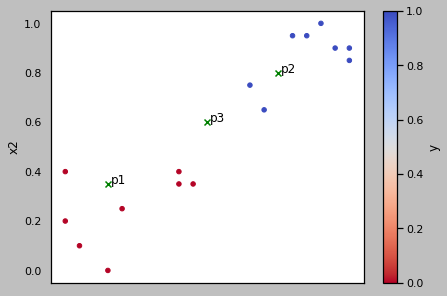

In [ ]:
# Plot
data.plot.scatter("x1", "x2", c="y", colormap="coolwarm_r", figsize=(7, 5))
plt.scatter(p.x1, p.x2, c="green", marker="x")
for point in p.values:
  plt.text(point[1]+0.01, point[2], point[0])

The two classes can be identified on the above scatter plot. In addition, p1 seems to belong to class 0, p2 to class 1, and this is more difficult for p3. 

Below we classify the new points using the KNN algorithm with different k (i.e. the number of neightboor we consider). Please note that we skip the train-test split as the dataset is very small, however this should still be applied before training the model in a real-life scenario.

In [ ]:
# Select X and y
X = data[["x1", "x2"]]
y = data["y"]

First build a simple model using the Sklearn KNeighbordClassifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

Let's have a look at what parameters it used by default. We can check their meaning by looking the the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

* How many neighbors? `n_neighbors` this is the number of neighbors to use. The default is 5.  
* What similarity/distance measure to use? `p` set p=2  to use the Euclidean distance (L2) and p = 1 to use the Manhattan distance (l1)
* What weight to give to the different neighbors? `weights` use uniform if all points should be given equal weight, use distance if you want to weigh neighbors by the inverse of their distance.

In [ ]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

But let's get back to our 3 points with unknown labels and see what class KNN would predict for them for different values of k.

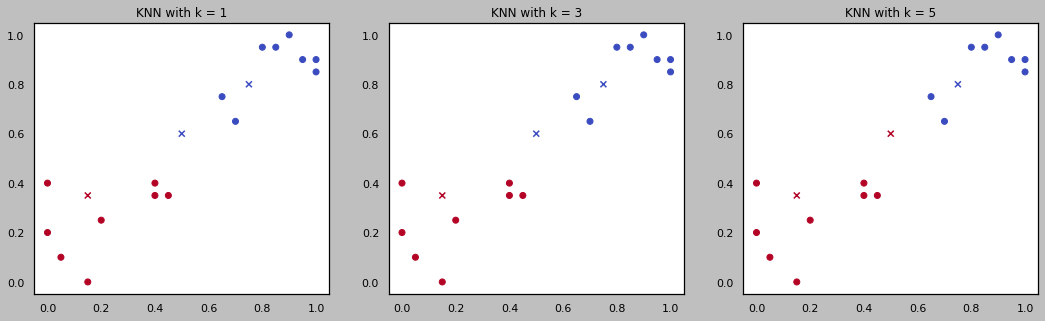

In [ ]:
# KNN plot
fig, ax = plt.subplots(1, 3, figsize=(18,5))
i = 0
for k in [1, 3, 5]:
  model = KNeighborsClassifier(n_neighbors=k).fit(X,y)
  pred = model.predict(p[["x1", "x2"]])
  ax[i].scatter(data.x1, data.x2, c=data.y, cmap="coolwarm_r")
  ax[i].scatter(p.x1, p.x2, c=pred, cmap="coolwarm_r", marker="x")
  ax[i].set_title("KNN with k = " + str(k))
  i += 1

For k = 1 and k = 3, p3 belongs to class 0 while it belongs to class 1 for k = 5.

### 2.2 Decision Trees
We now present a simple example for demonstrating how to use the decision tree classifier from sklearn. 

The goal is to learn a model that predicts the salary class (0 or 1) based on some existing individual characteristics. 

In [ ]:
# Change style (to make the trees below beautiful)
plt.style.use('classic')

In [ ]:
# set example equal to 1, 2 and 3 to got through the different examples
example = 1 # 1, 2 or 3 

if example == 1:
  data = {"Degree":["Apprenticeship", "Apprenticeship", "Master", "Bachelor", "Master", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[1, 1, 0, 1, 0, 1, 1, 0, 1, 1], 
  "Salary Class":[0, 0, 1, 0, 1, 0, 0, 1, 1, 1]}
  data = pd.DataFrame(data)
elif example == 2:
  data = {"Age":[20, 16, 50, 23, 36, 33, 41, 22, 27, 57],
  "Degree":["Apprenticeship", "School", "Master", "Bachelor", "Bachelor", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
  "Salary Class":[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]}
  data = pd.DataFrame(data)
elif example == 3:
  data = {"Degree":["Apprenticeship", "School", "Master", "Bachelor", "Bachelor", "Apprenticeship", "Bachelor", "Bachelor", "Master", "Master"],
  "Sex":[0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
  "Salary Class":[1, 1, 0, 1, 1, 0, 0, 0, 1, 1]}
  data = pd.DataFrame(data)
else:
  data = np.nan
  raise ValueError("'example' should be 1, 2 or 3")

data

,Degree,Sex,Salary Class
0,Apprenticeship,1,0
1,Apprenticeship,1,0
2,Master,0,1
3,Bachelor,1,0
4,Master,0,1
5,Apprenticeship,1,0
6,Bachelor,1,0
7,Bachelor,0,1
8,Master,1,1
9,Master,1,1


We have three examples.

Example 1: 
* All "Master" belong to class 1.
* Among the rest, if sex == 0, then class 1.
* A human could do the classification (easy).

Example 2:
* More difficult to see something...
* Hint: look at young people...

Example 3:
* Illustrates that it is sometimes difficut to classify.
* This is because of lack of pattern in the data.
* If there is nothing to discover, then the algorithm will discover nothing...
* The tree for this model illustrates this well.

In [ ]:
# Encode the categorical feature
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
one_hot_degree = one_hot.fit_transform(data[["Degree"]]).toarray()
one_hot_degree = pd.DataFrame(one_hot_degree, columns=one_hot.get_feature_names())
one_hot_degree

,x0_Apprenticeship,x0_Bachelor,x0_Master
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [ ]:
# Concatenate back in the dataframe your one-hot encoded features
data_tree = pd.concat([data, one_hot_degree], axis=1)
data_tree

,Degree,Sex,Salary Class,x0_Apprenticeship,x0_Bachelor,x0_Master
0,Apprenticeship,1,0,1.0,0.0,0.0
1,Apprenticeship,1,0,1.0,0.0,0.0
2,Master,0,1,0.0,0.0,1.0
3,Bachelor,1,0,0.0,1.0,0.0
4,Master,0,1,0.0,0.0,1.0
5,Apprenticeship,1,0,1.0,0.0,0.0
6,Bachelor,1,0,0.0,1.0,0.0
7,Bachelor,0,1,0.0,1.0,0.0
8,Master,1,1,0.0,0.0,1.0
9,Master,1,1,0.0,0.0,1.0


In [ ]:
# Select X and y
X = data_tree.drop(["Degree", "Salary Class"], axis=1)
y = data_tree["Salary Class"]

# Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.score(X, y)

1.0

Let's plot our decision tree.   
It starts with the root in which we have 10 samples (our data points) of which 5 belong to class 0 and 5 belong to class 1.  
Each node represents a condition on which the tree splits into branches. The end of a branch that no longer splits is a leaf, in this case salary class 0 (orange) or 1 (blue).  
The gini coefficient is our measure of purity of each node. In our dataset we start with 0.5 (corresponds to the 50-50 distribution of classes in the root) and then gradually go down to 0 (maximum purity). 

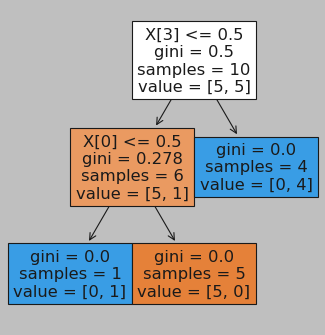

In [ ]:
plt.figure(figsize=(5,5))
plot_tree(tree, filled=True);

In [ ]:
# To see the splits
pd.concat([X, y], axis=1).head(2)

,Sex,x0_Apprenticeship,x0_Bachelor,x0_Master,Salary Class
0,1,1.0,0.0,0.0,0
1,1,1.0,0.0,0.0,0


What is the depth of this tree?

In [ ]:
tree.get_depth()

2

Let's have a look at the parameters of our classifier. For more help, have a look at the [sklearn documentation for this classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [ ]:
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Some of the parameters reviewed:

* Limit the maximum depth of my tree with `max_depth`.

* Set a minimum number of observations in each leaf with `min_samples_leaf`

With sklearn, the default `criterion` for determining the split at each node is the Gini index. [For more info you can read this Medium post](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8). It is based on this criterion that the algorithm choses which feature and what condition on this feature to use to make the best split.

#### **Important note**: if you end up with a deep tree and a **train** accuracy close to or equal to 1, there is a big probability of overfitting, as explained [here](https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6). The solution to avoid overfitting and find the best hyperparameters is to use cross-validation. More on this in Section 3 below.

## 3. Drug Classification
We classify people into drug categories according to their individual characteristics.

### 3.1 Load, Clean and Explore Data

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week7/data/drug200.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


The variables:

* Age: Age of patient
* Sex: Gender of patient
* BP: Blood pressure of patient
* Cholesterol: Cholesterol of patient
* Na_to_K: Sodium to Potassium Ratio in Blood
* Drug: Drug Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


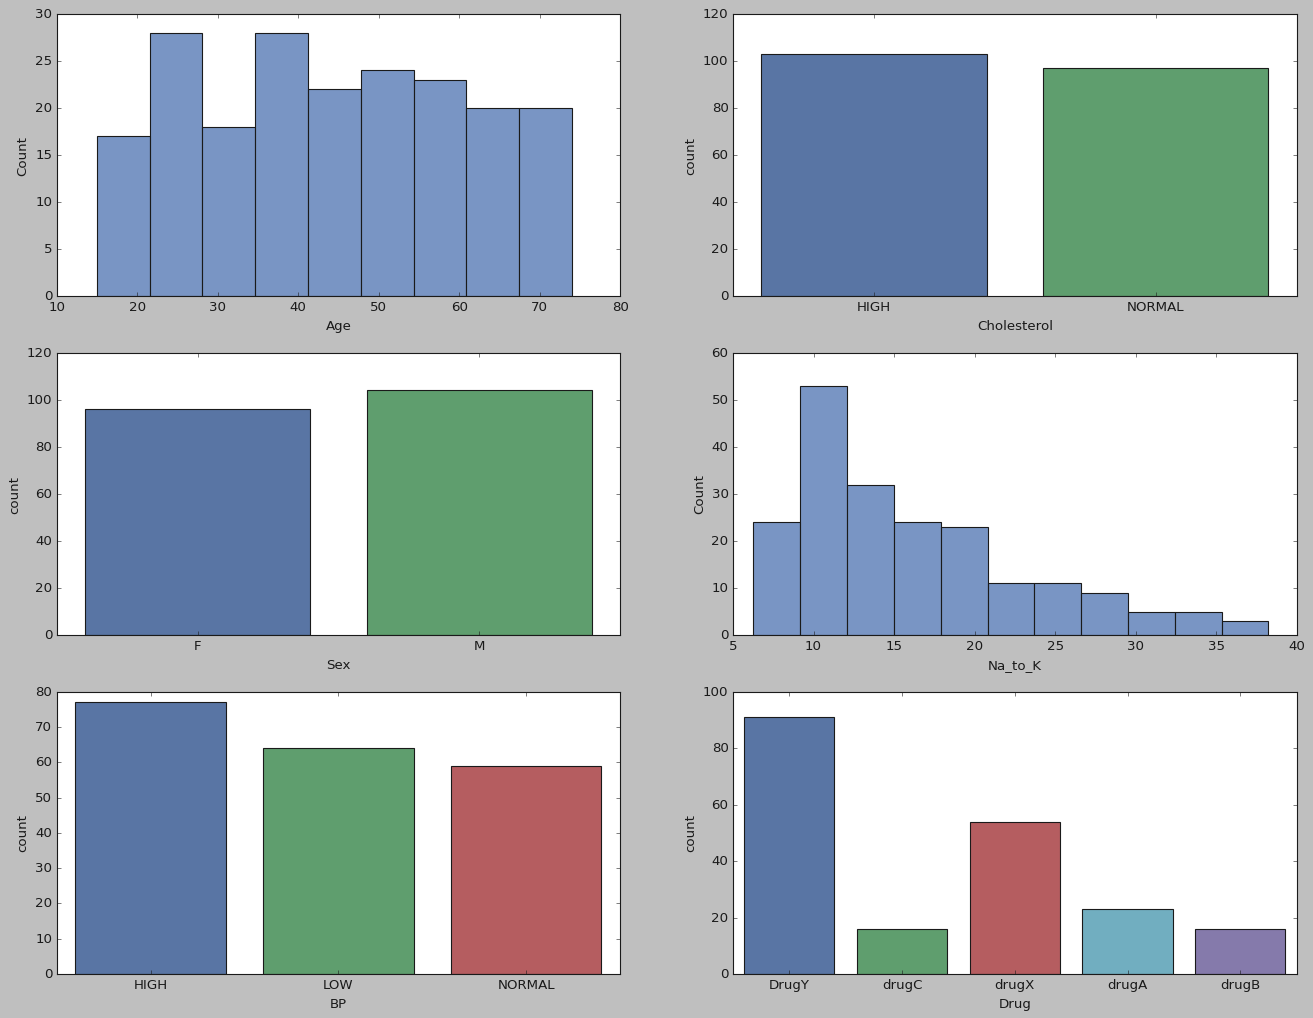

In [ ]:
# Univariate Analysis
fig, ax = plt.subplots(3, 2, figsize=(20,15))
i = 0
j = 0
for var in df:
  if df[var].dtypes == "object":
    sns.countplot(x=df[var], ax=ax[i, j])
  else:
    sns.histplot(df[var], ax=ax[i, j])
  i += 1
  if i == 3:
    i = 0
    j += 1
plt.show()

Show the relative frequency of the different drug classes.

In [ ]:
df.Drug.value_counts(normalize=True)

DrugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: Drug, dtype: float64

<Figure size 800x800 with 0 Axes>

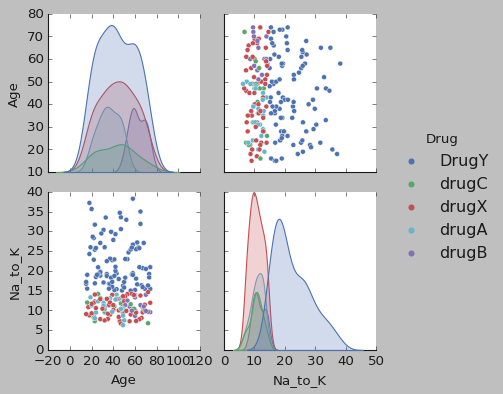

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df, hue="Drug")

We see that all people with a Na_to_K ratio above around 15 take DrugY. This will be useful for classification.

### 3.2 Prepare data for algorthms

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Label encoding: two possibilities

Using ColumnTransformer from sklearn

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# instantiate encoder
oe=OrdinalEncoder()
# select variables for label encoding
categorical_cols=['Sex', 'BP', 'Cholesterol', 'Drug']
# set up your preprocessor (name, transformer, columns to transform)
preprocessor = ColumnTransformer([('categorical', oe, categorical_cols)], remainder='passthrough')
# fit pre-processor
encoded_df = pd.DataFrame(preprocessor.fit_transform(df), columns=['Sex', 'BP', 'Cholesterol', 'Drug', 'Age', 'Na_to_K'])
encoded_df

,Sex,BP,Cholesterol,Drug,Age,Na_to_K
0,0.0,0.0,0.0,0.0,23.0,25.355
1,1.0,1.0,0.0,3.0,47.0,13.093
2,1.0,1.0,0.0,3.0,47.0,10.114
3,0.0,2.0,0.0,4.0,28.0,7.798
4,0.0,1.0,0.0,0.0,61.0,18.043
...,...,...,...,...,...,...
195,0.0,1.0,0.0,3.0,56.0,11.567
196,1.0,1.0,0.0,3.0,16.0,12.006
197,1.0,2.0,0.0,4.0,52.0,9.894
198,1.0,2.0,1.0,4.0,23.0,14.020


Or label encoding using the Pandas `astype` function.

In [ ]:
# Label Encoding
df.Sex = df.Sex.astype('category').cat.codes
df.BP = df.BP.astype('category').cat.codes
df.Cholesterol = df.Cholesterol.astype('category').cat.codes
df.Drug = df.Drug.astype('category').cat.codes
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
# Select Features
X = df.drop(["Drug"], axis=1)
y = df.Drug

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=72)
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
90,62,1,2,0,16.594
163,21,0,0,1,28.632
76,36,0,0,0,11.198
113,65,0,1,1,13.769
98,20,1,0,1,35.639
...,...,...,...,...,...
69,18,0,0,1,24.276
101,45,0,0,0,12.854
74,31,1,0,1,17.069
46,37,0,0,0,13.091


Calculate the base rate.

In [ ]:
from sklearn.dummy import DummyClassifier

# instantiate with the "most frequent" parameter
dummy = DummyClassifier(strategy='most_frequent')

# fit it as if we had no X features to train it on
dummy.fit(None, y_train)

#compute test baseline and store it for later
baseline = dummy.score(None, y_test)
baseline

0.42857142857142855

### 3.3 KNN and tuning hyperparameters with GridSearch

We first need to normalize (i.e. rescale) the data since we are using distances. The `MinMaxScaler()` maps the data in the interval (0,1).

In [ ]:
# Normalization (since distance)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) #note fit only on X_train, then transofrm both X_train and X_test
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)
X_train_norm[:10]

array([[0.79661017, 1.        , 1.        , 0.        , 0.32287823],
       [0.10169492, 0.        , 0.        , 1.        , 0.69932454],
       [0.3559322 , 0.        , 0.        , 0.        , 0.15413722],
       [0.84745763, 0.        , 0.5       , 1.        , 0.23453624],
       [0.08474576, 1.        , 0.        , 1.        , 0.91844393],
       [0.13559322, 0.        , 0.        , 0.        , 0.59684783],
       [0.52542373, 1.        , 1.        , 1.        , 0.03177184],
       [0.72881356, 0.        , 0.        , 1.        , 0.24923385],
       [0.3559322 , 1.        , 0.5       , 1.        , 0.16120458],
       [0.88135593, 1.        , 1.        , 1.        , 0.10147601]])

It is also possible to normalize using a ColumnTransformer from sklearn.

In [ ]:
# instantiate scaler
scaler = MinMaxScaler()

# select X variables for normalization (here all but could be fewer)
normalized_cols=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
# set up your preprocessor (name, transformer, columns to transform)
preprocessor = ColumnTransformer([('minmax', scaler, normalized_cols)], remainder='passthrough')
# fit pre-processor
X_train_norm = preprocessor.fit_transform(X_train) #note fit_trasnform on X_train
X_test_norm = preprocessor.transform(X_test) # note ONLY trasnform on X_test
X_train_norm[:10]

array([[0.79661017, 1.        , 1.        , 0.        , 0.32287823],
       [0.10169492, 0.        , 0.        , 1.        , 0.69932454],
       [0.3559322 , 0.        , 0.        , 0.        , 0.15413722],
       [0.84745763, 0.        , 0.5       , 1.        , 0.23453624],
       [0.08474576, 1.        , 0.        , 1.        , 0.91844393],
       [0.13559322, 0.        , 0.        , 0.        , 0.59684783],
       [0.52542373, 1.        , 1.        , 1.        , 0.03177184],
       [0.72881356, 0.        , 0.        , 1.        , 0.24923385],
       [0.3559322 , 1.        , 0.5       , 1.        , 0.16120458],
       [0.88135593, 1.        , 1.        , 1.        , 0.10147601]])

And now fit the KNN model.

0.7


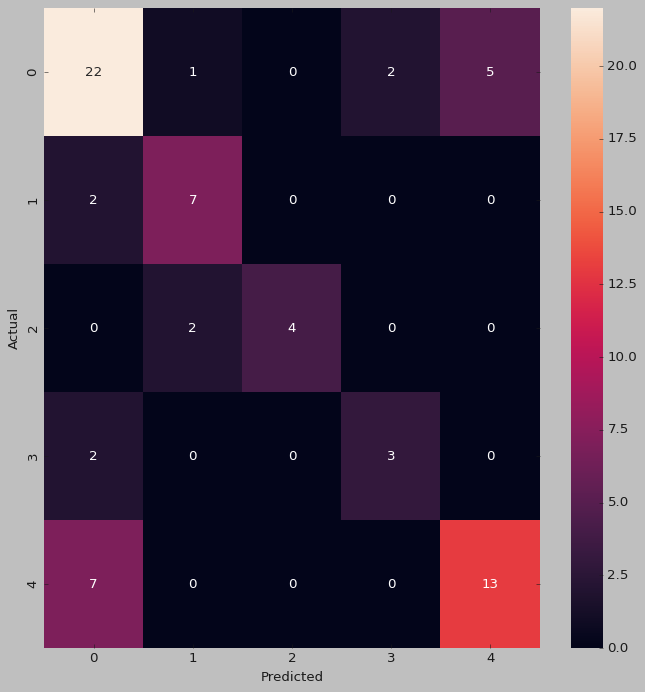

In [ ]:
# Fit KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_norm, y_train)

# Prediction for test set
y_pred = knn.predict(X_test_norm)

# Evaluate model
def accuracy_conf_mat(y_test, y_pred):
  print(round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred)

We now want to find which hyperparameters of the [KNN class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) are the optimal ones. For this we use [Grid Search Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Grid Search - hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define parameters to test
grid = {'n_neighbors':np.arange(1,100),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

# Define and fit model
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=10)
knn_cv.fit(X_train_norm, y_train)

# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", round(knn_cv.best_score_, 4))
print("Test Score:", round(knn_cv.score(X_test_norm, y_test), 4))

Hyperparameters: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Train Score: 0.8308
Test Score: 0.8143


0.8143


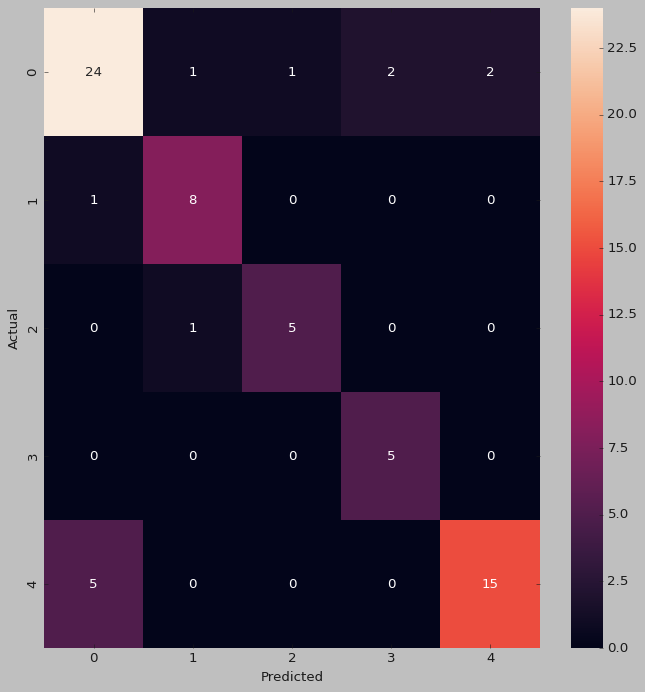

In [ ]:
# Fit optimal KNN model
knn = KNeighborsClassifier(n_neighbors=1, p=2, weights='uniform')
knn.fit(X_train_norm, y_train)

# Prediction for test set
y_pred = knn.predict(X_test_norm)

# Evaluate model
def accuracy_conf_mat(y_test, y_pred):
  print(round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred)

### 3.4 Decision Tree

0.9714


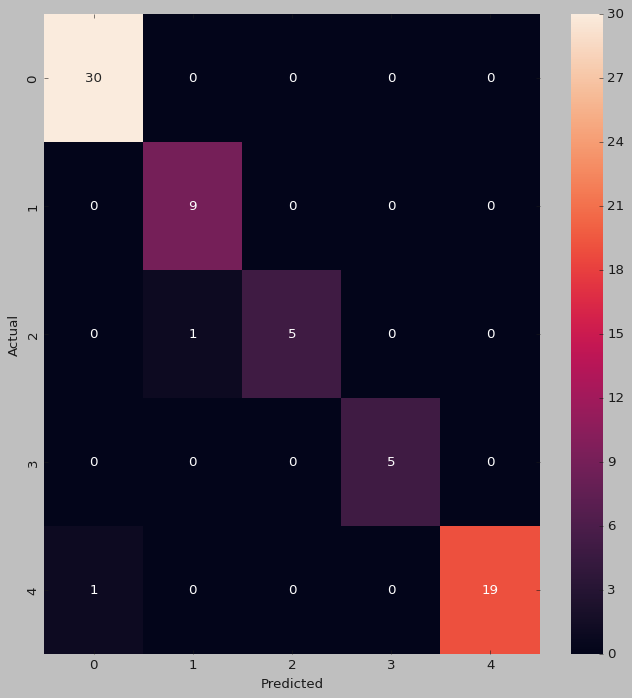

In [ ]:
# Fit model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

# Evaluate model
accuracy_conf_mat(y_test, y_pred)

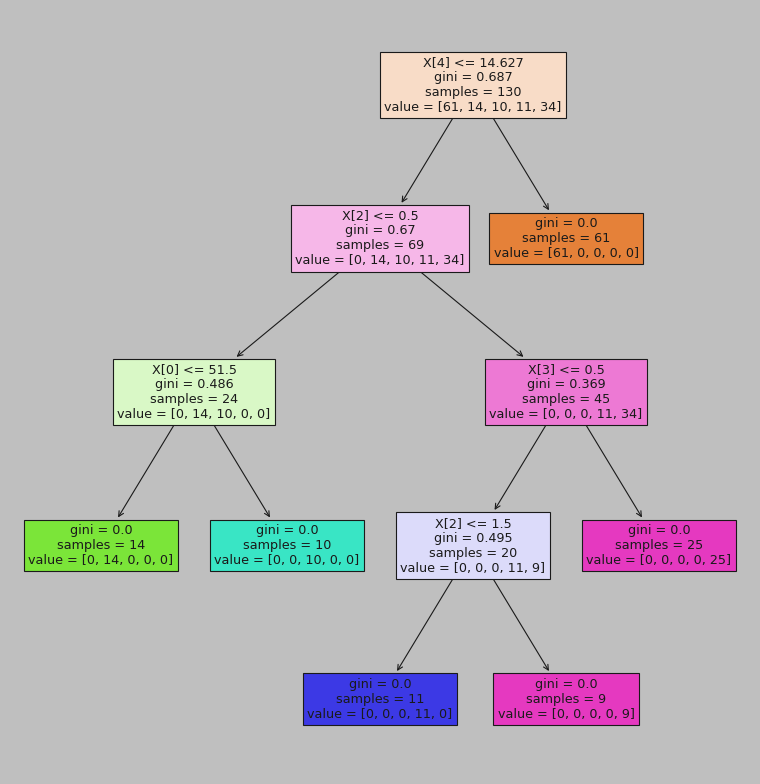

In [ ]:
plt.figure(figsize=(12, 12))
plot_tree(tree, filled=True);

In [ ]:
tree.get_depth()

4

In [ ]:
# First split totally identifies the leaf for drug Y (labelled with 0)
training_data = pd.concat([X_train, y_train], axis=1)
training_data[training_data.Na_to_K > 14.627]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
90,62,1,2,0,16.594,0
163,21,0,0,1,28.632,0
98,20,1,0,1,35.639,0
0,23,0,0,0,25.355,0
6,49,0,2,0,16.275,0
...,...,...,...,...,...,...
29,45,1,1,0,17.951,0
26,31,1,0,0,30.366,0
69,18,0,0,1,24.276,0
74,31,1,0,1,17.069,0


In [ ]:
# Accuracy in training set
tree.score(X_train, y_train)

1.0

We are not in the above-mentioned case of overfitting here since good results in test data. In addition a depth of 4 with 5 classes is optimal. With real life data, this may be different... We can however try with different tree depths.

Depth: 2
0.83


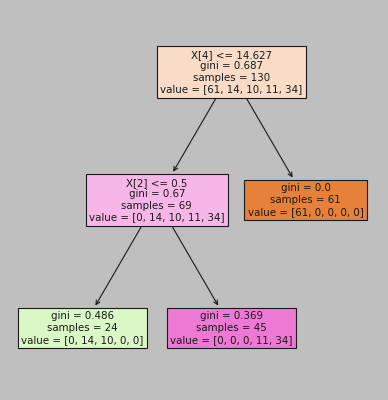






Depth: 3
0.81


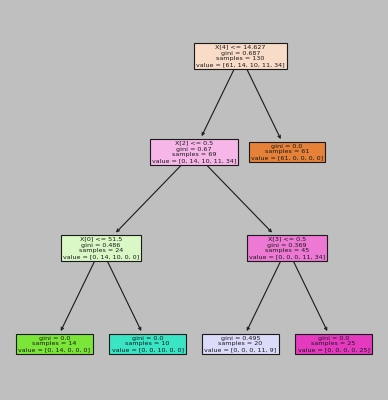






Depth: 4
0.97


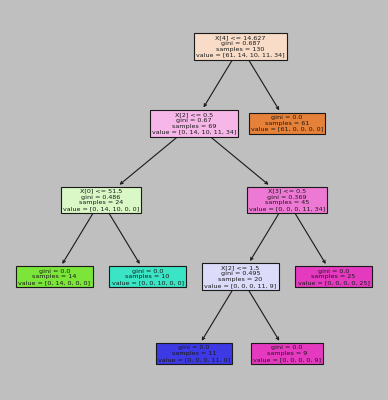






Depth: 5
0.97


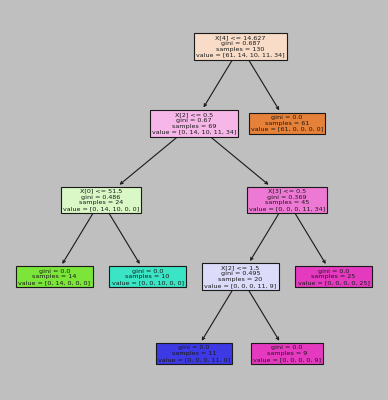

In [ ]:
# Look for simpler trees
for depth in [2, 3, 4, 5]:
    tree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print("Depth: " + str(depth))
    print(round(accuracy_score(y_test, y_pred), 2))
    plt.figure(figsize=(6, 6))
    plot_tree(tree, filled=True)
    plt.show()
    print("\n\n\n\n")

And this is how we can set up grid search to tune the optimal value of maximum tree depth.

In [ ]:
# Grid Search - tuning tree depth

# Define parameter to test
grid = {'max_depth':np.arange(1,7)}

# Define and fit model

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, grid, cv=5)
tree_cv.fit(X_train, y_train)

# Print results
print("Hyperparameters:", tree_cv.best_params_)
print("Train Score:", round(tree_cv.best_score_, 4))
print("Test Score:", round(tree_cv.score(X_test, y_test), 4))

Hyperparameters: {'max_depth': 4}
Train Score: 0.9923
Test Score: 0.9714


### 4. Exercise

The objective is to illustrate the power of decision trees with data having non-linear boundaries.

In [ ]:
# Data Set
fruit = {"width":[3, 3.5, 3.5, 2.5, 4, 3.2, 3.6, 4.0, 2.8, 3.9, 7.7, 7.2, 7.8, 8.3, 7.3, 7.1, 8.5, 7.3, 9.2, 7.9, 7.3, 8.7],
"height":[1.5, 2.5, 2, 1.3, 2.1, 7.4, 8.3, 7.9, 9.1, 8.5, 8.1, 7.8, 6.9, 7.4, 7.1, 7.1, 3.8, 4.2, 4.9, 5.4, 3.8, 4.4],
"fruit":["orange", "orange", "orange", "orange", "orange", "apple", "apple", "apple", "apple", "apple", "orange", "orange", "orange", "orange", "orange", "orange", "apple", "apple", "apple", "apple", "apple", "apple"]}

fruit = pd.DataFrame(fruit)
fruit

,width,height,fruit
0,3.0,1.5,orange
1,3.5,2.5,orange
2,3.5,2.0,orange
3,2.5,1.3,orange
4,4.0,2.1,orange
5,3.2,7.4,apple
6,3.6,8.3,apple
7,4.0,7.9,apple
8,2.8,9.1,apple
9,3.9,8.5,apple


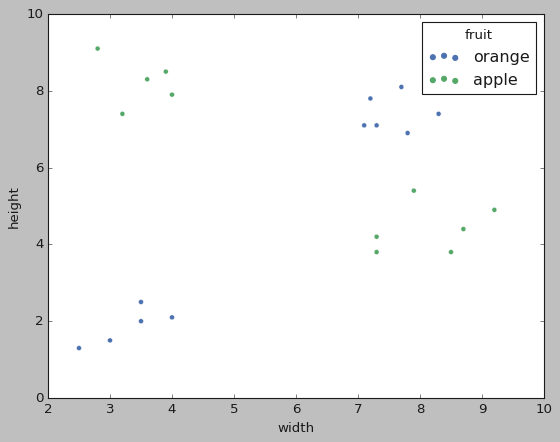

In [ ]:
# Plot
sns.scatterplot(data=fruit, x='width', y='height', hue='fruit');

In [ ]:
# Select variables
X = fruit[["width", "height"]]
y = fruit.fruit

In [ ]:
from sklearn.linear_model import LogisticRegression
# 1. Apply a Logistic Regression to the data. What is the train accuracy?
LR = LogisticRegression()
LR.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 2. Apply a Decision Tree to the data.

In [ ]:
# 3. What is the train accuracy? Plot the tree. What is the depth of the tree? 

## References:
https://www.kaggle.com/gorkemgunay/drug-classification-with-different-algorithms/notebook